In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install turicreate
import turicreate

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [7]:
image_train = turicreate.SFrame('../input/image-train-data')
image_test = turicreate.SFrame('../input/image-test-data')

In [8]:
turicreate.visualization.set_target(target='auto')


In [10]:
image_train.show()


Materializing SFrame

Warning: Skipping column 'image'. Unable to show columns of type 'image'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [12]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,target='label',
                                              features=['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.018770  | 1.303759     | 0.280987          | 0.257426            |

| 1         | 10       | 1.595467  | 1.691581     | 0.366071          | 0.356436            |

| 2         | 11       | 1.595467  | 1.841960     | 0.423319          | 0.425743            |

| 3         | 17       | 0.610541  | 2.281099     | 0.443277          | 0.435644            |

| 4         | 23       | 2.469939  | 2.725485     | 0.448529          | 0.465347            |

| 9         | 36       | 3.569603  | 3.980948     | 0.532563          | 0.445545            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

,SArray
0,
1,
2,

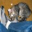
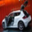
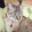

In [15]:
image_test[0:3]['image'].explore()

In [16]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [17]:
raw_pixel_model.predict(image_test[0:3])


dtype: str
Rows: 3
['bird', 'cat', 'bird']

In [18]:
raw_pixel_model.evaluate(image_test)


{'accuracy': 0.48175,
 'auc': 0.7244760416666647,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     cat      |       cat       |  403  |
 |     dog      |    automobile   |  123  |
 |     dog      |       bird      |  230  |
 |     cat      |    automobile   |  173  |
 |     dog      |       dog       |  360  |
 |     cat      |       dog       |  240  |
 |     bird     |    automobile   |  157  |
 |  automobile  |    automobile   |  650  |
 |     bird     |       cat       |  210  |
 |  automobile  |       bird      |  101  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.4786942163978215,
 'log_loss': 1.2003615729778343,
 'precisio

In [19]:
len(image_train)


2005

In [20]:
#deep_learning_model = turicreate.load_model('http://s3.amazonaws.com/GraphLab-Datasets/deeplearning/imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [21]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [23]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                         features=['deep_features'],
                                                         target='label')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.378942     | 0.763130          | 0.762376            |

| 1         | 7        | 0.125000  | 1.058355     | 0.772584          | 0.712871            |

| 2         | 8        | 0.156250  | 1.358564     | 0.773109          | 0.712871            |

| 3         | 12       | 0.468750  | 2.025462     | 0.809349          | 0.722772            |

| 4         | 13       | 0.585938  | 2.328741     | 0.829832          | 0.722772            |

| 9         | 19       | 1.000000  | 3.981916     | 0.937500          | 0.811881            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [24]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

,SArray
0,
1,
2,

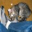
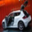
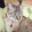

In [25]:
image_test[0:3]['image'].explore()

In [26]:
deep_features_model.evaluate(image_test)


{'accuracy': 0.795,
 'auc': 0.9401577083333331,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   12  |
 |     bird     |       dog       |   55  |
 |     dog      |       cat       |  190  |
 |     cat      |       bird      |   74  |
 |  automobile  |       dog       |   9   |
 |     dog      |       bird      |   53  |
 |     cat      |    automobile   |   30  |
 |     cat      |       cat       |  661  |
 |     bird     |       cat       |  121  |
 |     cat      |       dog       |  235  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.794916735374161,
 'log_loss': 0.688607578153971,
 'precision': 